In [1]:
import numpy as np
from utils import generator
from cv2 import imread, imwrite
import matplotlib.pylab as plt

In [5]:
from utils import add_neuron_subdir,add_trial_subdir

In [2]:
from sklearn.decomposition import PCA

In [10]:
from os.path import join
import os

In [109]:
exp_dir = r"D:\Generator_DB_Windows\data\with_CNN"
neuron = ('caffe-net', 'fc8', 1)
this_exp_dir = add_neuron_subdir(neuron, exp_dir)

In [8]:
from glob import glob

In [13]:
trialnamelist = os.listdir(this_exp_dir)

In [110]:
datadict = np.load(join(this_exp_dir, trialnamelist[0], "codes_all.npz"))
print(trialnamelist[0])

choleskycma_sgm3_uf10_cc0.00_cs0.05


In [111]:
codes_all = datadict['codes_all']
generations = datadict['generations']

In [19]:
pca = PCA(n_components=10,copy=True)
PC_codes = pca.fit_transform(codes_all)

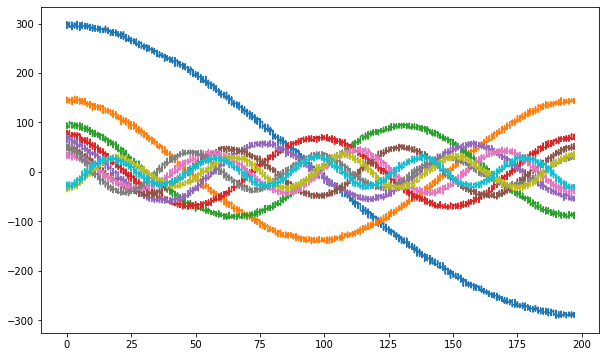

In [27]:
plt.figure(figsize=[10,6])
plt.plot(generations,PC_codes)
plt.show()

In [29]:
codes_all.shape

(7920, 4096)

## Example Analysis of Code

In [62]:
exp_dir = r"D:\Generator_DB_Windows\data\with_CNN"
this_exp_dir = os.path.join(exp_dir, "purenoise")
trial_title = 'choleskycma_sgm3_uf10_cc%.2f_cs%.2f' % (0.00097, 0.0499)
trialdir = add_trial_subdir(this_exp_dir, trial_title)

In [63]:
import utils
codes_all, generations = utils.codes_summary(trialdir)

In [35]:
codes_all.shape

(7920, 4096)

In [68]:
import numpy as np
from sklearn.linear_model import LinearRegression

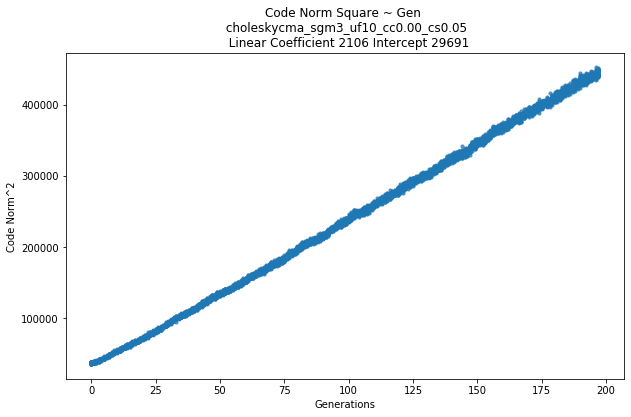

In [112]:
code_norm = np.sum(codes_all**2, axis=1)#np.sqrt()
model = LinearRegression().fit(generations.reshape(-1, 1), code_norm)
plt.figure(figsize=[10,6])
plt.scatter(generations, code_norm,s=10,alpha =0.7)
plt.title("Code Norm Square ~ Gen \n %s\n  Linear Coefficient %.f Intercept %.f"%(trial_title,model.coef_[0], model.intercept_))
plt.ylabel("Code Norm^2")
plt.xlabel("Generations")
plt.savefig("code_norm_evolution.png")
plt.show()

In [113]:
pca = PCA(n_components=50,copy=True)
PC_codes = pca.fit_transform(codes_all)

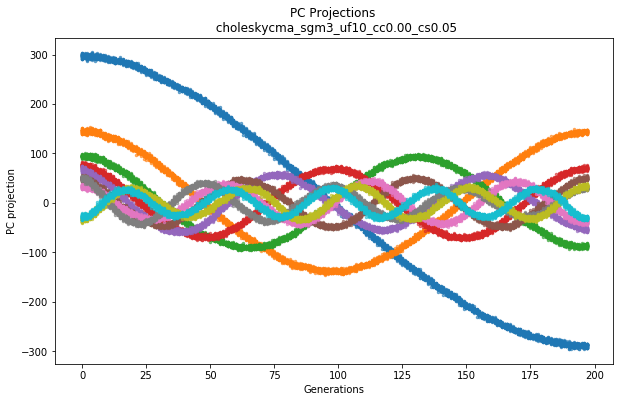

In [114]:
plt.figure(figsize=[10,6])
for i in range(10):
    plt.scatter(generations,PC_codes[:,i],s=6,alpha=0.6)
plt.xlabel("Generations")
plt.ylabel("PC projection")
plt.title("PC Projections \n %s"%(trial_title))
plt.savefig("PC_Proj_evolution.png")
plt.show()

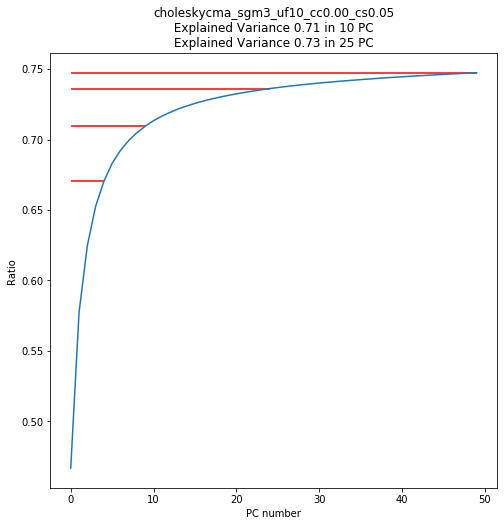

In [115]:
plt.figure(figsize=[8,8])
cumsumvar = np.cumsum(pca.explained_variance_ratio_)
#plt.plot(pca.explained_variance_ratio_)
plt.plot(cumsumvar)
for mark in [5, 10, 25, 50]:
    plt.hlines(cumsumvar[mark-1], 0, mark-1, 'r')
plt.ylabel("Ratio")
plt.xlabel("PC number")
plt.title("%s\n Explained Variance %.2f in 10 PC \nExplained Variance %.2f in 25 PC"%(trial_title, 
                                                                                      sum(pca.explained_variance_ratio_[:10]),
                                                                                      sum(pca.explained_variance_ratio_[:20])))
plt.savefig("exp_variance.png")
plt.show()

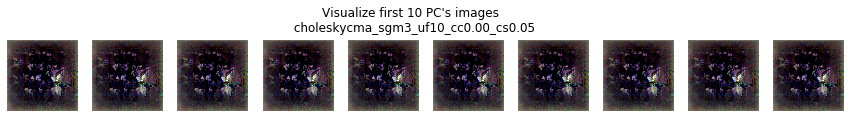

In [116]:
plt.figure(figsize=[15,2])
for i in range(10):
    plt.subplot(1,10,i+1)
    img = generator.visualize(pca.components_[i, :])
    plt.imshow(img.copy())
    plt.axis("off")
plt.suptitle("Visualize first 10 PC's images \n %s"%(trial_title, ))
plt.savefig("PC_visualization.png")
plt.show()